In [1]:
! ls

cytounet  sample_data


In [2]:
! rm -r cytounet

In [3]:
! git clone https://github.com/Nelson-Gon/cytounet.git

Cloning into 'cytounet'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 733 (delta 1), reused 3 (delta 1), pack-reused 726
Receiving objects: 100% (733/733), 49.43 MiB | 3.48 MiB/s, done.
Resolving deltas: 100% (275/275), done.


In [4]:
%cd cytounet

/content/cytounet


In [5]:
from cytounet.model import *
from cytounet.data import *
from cytounet.augmentation import *

Using TensorFlow backend.


In [6]:
!  ls examples/BBBC003_v1/

images	truth


In [7]:
data_generator_args =  dict(rotation_range=90,
                      rescale = 1./255,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    shear_range=0.1,
                    zoom_range=0.1,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [8]:
! if [ ! -d "aug" ]; then mkdir aug;fi

In [9]:
!ls

aug	      _config.yml  examples  README.md	 requirements.txt  setup.py
changelog.md  cytounet	   LICENSE   README.rst  setup.cfg


In [10]:
train_gen = generate_train_data(4, "examples/BBBC003_v1","images", "truth",aug_dict = data_generator_args,
                                 seed = 423, target_size = (256, 256), save_to_dir="aug")

In [11]:
for index, batch in enumerate(train_gen):
  if index >= 4:
    break

Found 15 images belonging to 1 classes.
Found 15 images belonging to 1 classes.


In [12]:
! if [ ! -d "aug/images" ]; then echo "Making directory" && mkdir aug/images aug/masks; else ls aug/images;fi

Making directory


In [13]:
! mv aug/image_* aug/images && mv aug/mask_* aug/masks && ls aug -R

aug:
images	masks

aug/images:
image_0_5071202.png   image_1_416819.png    image_7_1112375.png
image_10_1171465.png  image_14_3715003.png  image_7_3404337.png
image_11_6148385.png  image_2_3747351.png   image_8_4028953.png
image_12_6288235.png  image_3_8701762.png   image_9_2384324.png
image_12_972709.png   image_4_268684.png    image_9_4191156.png
image_13_8231043.png  image_5_331571.png
image_1_3948213.png   image_6_9155399.png

aug/masks:
mask_0_5071202.png   mask_1_416819.png	  mask_7_1112375.png
mask_10_1171465.png  mask_14_3715003.png  mask_7_3404337.png
mask_11_6148385.png  mask_2_3747351.png   mask_8_4028953.png
mask_12_6288235.png  mask_3_8701762.png   mask_9_2384324.png
mask_12_972709.png   mask_4_268684.png	  mask_9_4191156.png
mask_13_8231043.png  mask_5_331571.png
mask_1_3948213.png   mask_6_9155399.png


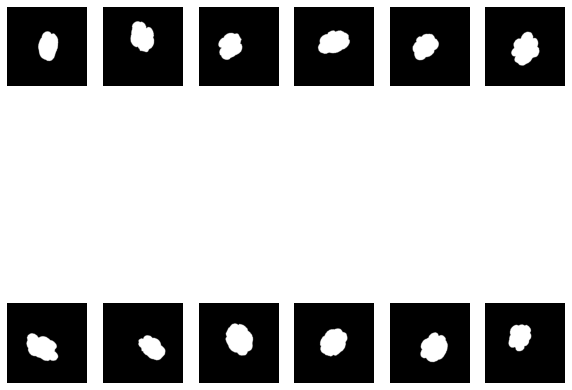

In [14]:
show_images("aug/masks", number = 12)

In [15]:
model = unet(input_size = (256, 256, 1),  learning_rate=3e-5, metrics = ['accuracy'], loss='binary_crossentropy')

In [16]:
history = model.fit_generator(train_gen, steps_per_epoch=1000,epochs=10)

Epoch 1/10
1000/1000 [==============================] - 442s 442ms/step - loss: 0.1677 - accuracy: 0.9359
Epoch 2/10
1000/1000 [==============================] - 426s 426ms/step - loss: 0.0437 - accuracy: 0.9831
Epoch 3/10
1000/1000 [==============================] - 427s 427ms/step - loss: 0.0255 - accuracy: 0.9888
Epoch 4/10
1000/1000 [==============================] - 427s 427ms/step - loss: 0.0204 - accuracy: 0.9914
Epoch 5/10
1000/1000 [==============================] - 426s 426ms/step - loss: 0.0236 - accuracy: 0.9904
Epoch 6/10
1000/1000 [==============================] - 426s 426ms/step - loss: 0.0194 - accuracy: 0.9913
Epoch 7/10
1000/1000 [==============================] - 425s 425ms/step - loss: 0.0123 - accuracy: 0.9926
Epoch 8/10
1000/1000 [==============================] - 425s 425ms/step - loss: 0.0111 - accuracy: 0.9927
Epoch 9/10
1000/1000 [==============================] - 426s 426ms/step - loss: 0.0176 - accuracy: 0.9926
Epoch 10/10
1000/1000 [=======================

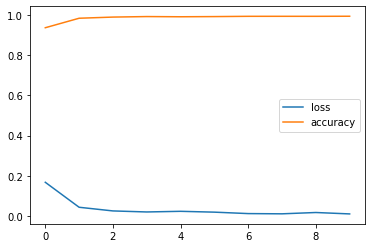

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss', 'accuracy'])

In [18]:
test_images = generate_test_data("aug/images", 10, image_suffix="png")

In [19]:
model.save("unet_embryo.hdf5")

In [20]:
model = unet(pretrained_weights="unet_embryo.hdf5")

In [21]:
results = model.predict_generator(test_images, 10, verbose=1)

10/10 [==============================] - 2s 197ms/step


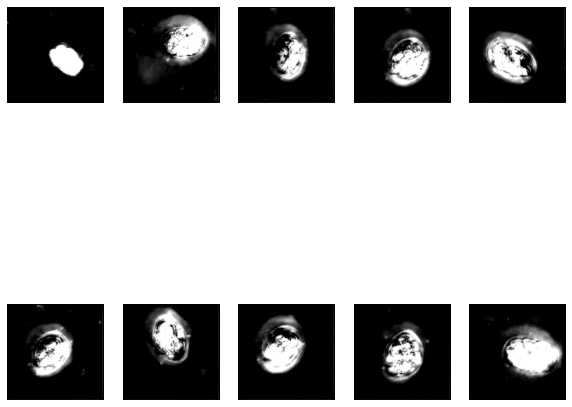

In [22]:
show_images(results, number = 10)

In [23]:
! if [ ! -d "predictions" ];then mkdir predictions;fi

In [24]:
save_predictions("predictions", results,"predicted_", image_suffix="png")

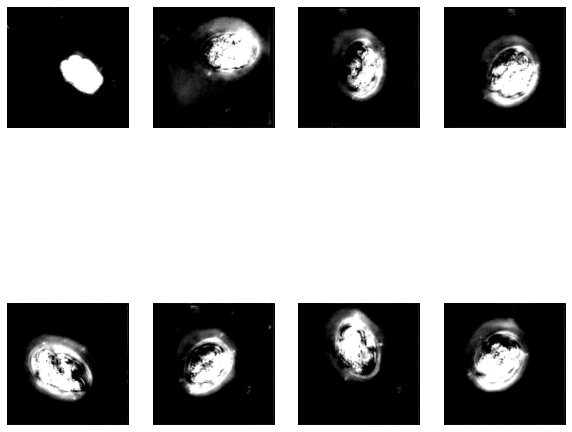

In [25]:
show_images("predictions",image_suffix="png",number = 8)